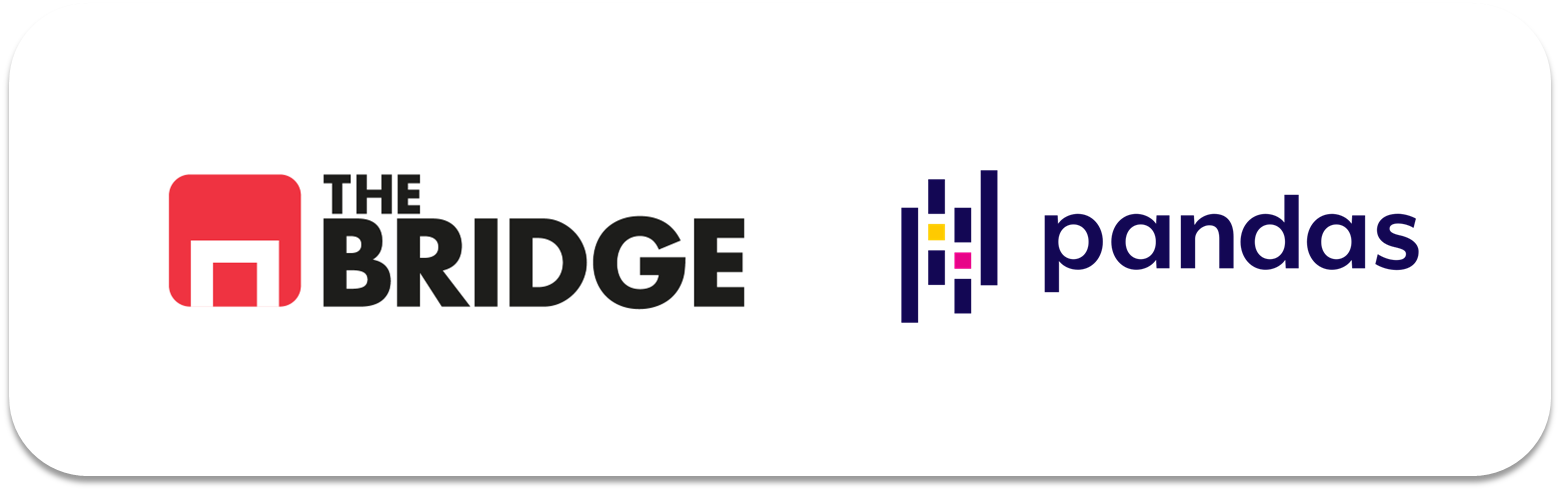

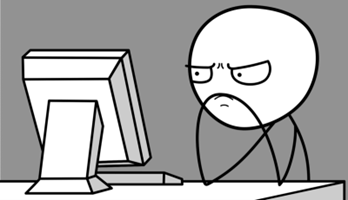

## EJERCICIOS: Manipulación

Para ejercitarte y afianzar lo aprendido sobre Manipulación de DataFrames, completa los siguiente ejercicios. Recuerda que puedes necesitar de algunos datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se publicarán en el repo de ejercicios a lo largo del curso.

### Ejercicio 0: 

Importa pandas "como debe ser" y cualquier otra librería que emplees en el notebook (también "como debe ser" si es necesario)

In [5]:
import numpy as np
import pandas as pd


## PARTE I

Supongamos que estás trabajando con un conjunto de datos de registros de clientes de una compañía de seguros. Los datos incluyen información como `ID de Cliente`, `Nombre`, `Edad`, `Dirección` y `Número de Póliza`. Debido a errores en la recopilación de datos, hay registros duplicados y algunos campos contienen valores NaN.



### Ejercicio 1
Crea un DataFrame de Pandas con los siguientes datos de ejemplo, que incluyen duplicados y valores NaN:

```python

# Datos de ejemplo
data = {
    'ID de Cliente': [101, 102, 103, 101, 102, 104, 105, np.nan],
    'Nombre': ['Juan Pérez', 'Ana Gómez', 'Lucas Martín', 'Juan Pérez', 'Ana Gómez', np.nan, 'Laura García', 'Carlos Ruiz'],
    'Edad': [28, 34, np.nan, 28, 34, np.nan, 30, 53],
    'Dirección': ['Calle Falsa 123', 'Avenida Siempreviva 45', 'Elm Street 500', 'Calle Falsa 123', np.nan, 'Baker Street 221B', 'Diagon Alley 3/4', np.nan],
    'Número de Póliza': [5555, 6666, 7777, 5555, 6666, 8888, 9999, 5555]
}

```

Observa que NaN es en realidad un valor de numpy (np.nan). Muestra de que tipo es...

In [7]:
data = {
    'ID de Cliente': [101, 102, 103, 101, 102, 104, 105, np.nan],
    'Nombre': ['Juan Pérez', 'Ana Gómez', 'Lucas Martín', 'Juan Pérez', 'Ana Gómez', np.nan, 'Laura García', 'Carlos Ruiz'],
    'Edad': [28, 34, np.nan, 28, 34, np.nan, 30, 53],
    'Dirección': ['Calle Falsa 123', 'Avenida Siempreviva 45', 'Elm Street 500', 'Calle Falsa 123', np.nan, 'Baker Street 221B', 'Diagon Alley 3/4', np.nan],
    'Número de Póliza': [5555, 6666, 7777, 5555, 6666, 8888, 9999, 5555]
}
datos_seguro = pd.DataFrame(data)
print(datos_seguro)
print(datos_seguro.dtypes)

   ID de Cliente        Nombre  Edad               Dirección  Número de Póliza
0          101.0    Juan Pérez  28.0         Calle Falsa 123              5555
1          102.0     Ana Gómez  34.0  Avenida Siempreviva 45              6666
2          103.0  Lucas Martín   NaN          Elm Street 500              7777
3          101.0    Juan Pérez  28.0         Calle Falsa 123              5555
4          102.0     Ana Gómez  34.0                     NaN              6666
5          104.0           NaN   NaN       Baker Street 221B              8888
6          105.0  Laura García  30.0        Diagon Alley 3/4              9999
7            NaN   Carlos Ruiz  53.0                     NaN              5555
ID de Cliente       float64
Nombre               object
Edad                float64
Dirección            object
Número de Póliza      int64
dtype: object


### Ejercicio 2
Detecta los registros duplicados en el DataFrame.


In [9]:
datos_seguro.duplicated(keep=False)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7    False
dtype: bool

### Ejercicio 3

Elimina los duplicados, manteniendo el primer registro de cada uno.


In [10]:
datos_seguro_dupli = datos_seguro.copy()

In [11]:
datos_seguro_dupli.drop_duplicates()

,ID de Cliente,Nombre,Edad,Dirección,Número de Póliza
0,101.0,Juan Pérez,28.0,Calle Falsa 123,5555
1,102.0,Ana Gómez,34.0,Avenida Siempreviva 45,6666
2,103.0,Lucas Martín,NaN,Elm Street 500,7777
4,102.0,Ana Gómez,34.0,NaN,6666
5,104.0,NaN,NaN,Baker Street 221B,8888
6,105.0,Laura García,30.0,Diagon Alley 3/4,9999
7,NaN,Carlos Ruiz,53.0,NaN,5555


### Ejercicio 4

Detecta las filas que tienen valores NaN.


In [12]:
datos_seguro_dupli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID de Cliente     7 non-null      float64
 1   Nombre            7 non-null      object 
 2   Edad              6 non-null      float64
 3   Dirección         6 non-null      object 
 4   Número de Póliza  8 non-null      int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 448.0+ bytes


### Ejercicio 5

Sustituye los valores NaN en la columna `Edad` por la media de edad del DataFrame.


In [13]:
datos_seguro_dupli["Edad"].value_counts(dropna = False)

Edad
28.0    2
34.0    2
NaN     2
30.0    1
53.0    1
Name: count, dtype: int64

In [16]:
datos_seguro_dupli["Edad"].mean()

np.float64(34.5)

In [20]:
datos_seguro_dupli.loc[datos_seguro_dupli["Edad"].isna(), "Edad"] = datos_seguro_dupli["Edad"].mean()
datos_seguro_dupli

,ID de Cliente,Nombre,Edad,Dirección,Número de Póliza
0,101.0,Juan Pérez,28.0,Calle Falsa 123,5555
1,102.0,Ana Gómez,34.0,Avenida Siempreviva 45,6666
2,103.0,Lucas Martín,34.5,Elm Street 500,7777
3,101.0,Juan Pérez,28.0,Calle Falsa 123,5555
4,102.0,Ana Gómez,34.0,NaN,6666
5,104.0,NaN,34.5,Baker Street 221B,8888
6,105.0,Laura García,30.0,Diagon Alley 3/4,9999
7,NaN,Carlos Ruiz,53.0,NaN,5555


### Ejercicio 6

Elimina las filas donde el `Nombre` es NaN.


In [21]:
datos_seguro_dupli.dropna(axis = "index", inplace = True)
datos_seguro_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 6
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID de Cliente     5 non-null      float64
 1   Nombre            5 non-null      object 
 2   Edad              5 non-null      float64
 3   Dirección         5 non-null      object 
 4   Número de Póliza  5 non-null      int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 240.0+ bytes


In [22]:
datos_seguro_dupli

,ID de Cliente,Nombre,Edad,Dirección,Número de Póliza
0,101.0,Juan Pérez,28.0,Calle Falsa 123,5555
1,102.0,Ana Gómez,34.0,Avenida Siempreviva 45,6666
2,103.0,Lucas Martín,34.5,Elm Street 500,7777
3,101.0,Juan Pérez,28.0,Calle Falsa 123,5555
6,105.0,Laura García,30.0,Diagon Alley 3/4,9999


### Ejercicio 7

Rellena los NaN restantes en la columna `Dirección` con la cadena 'Información no disponible'.


In [30]:
def rellenador(Dirección):
    if pd.isna(Dirección):
        return "Información no disponible"
    return Dirección

In [31]:
datos_seguro["Dirección"]= datos_seguro["Dirección"].apply(rellenador)
datos_seguro

,ID de Cliente,Nombre,Edad,Dirección,Número de Póliza
0,101.0,Juan Pérez,28.0,Información no disponible,5555
1,102.0,Ana Gómez,34.0,Información no disponible,6666
2,103.0,Lucas Martín,NaN,Información no disponible,7777
3,101.0,Juan Pérez,28.0,Información no disponible,5555
4,102.0,Ana Gómez,34.0,Información no disponible,6666
5,104.0,NaN,NaN,Información no disponible,8888
6,105.0,Laura García,30.0,Información no disponible,9999
7,NaN,Carlos Ruiz,53.0,Información no disponible,5555


In [36]:
%history -g

 1/1: print("Hola Mundo")
 2/1:
**Markdown**
*Jupyter*
***Python***
 2/2:
==resaltado==
<span style="color:blue">color</span>
 2/3:
>La Ciencia de Datos es el petróleo del siglo XXI
>>La Ciencia de Datos es el petróleo del siglo XXI
 4/1:
mi_lista = ['Arbol binario', 'Random Forest', 'Regresión Logística']
print("Lista desordenada: ", mi_lista)
mi_lista.sort(reverse=False)
print("Lista Ordenada: ", mi_lista)
 4/2: '[Por aquí se cruzan puentes](www.thebridge.tech)'
 7/1: |-----|-------|------|------|
 7/2: $\sqrt{3x-1} + {1+x}^2$
12/1:
print("""¿Por qué esta magnífica teconología científica,
                 que ahorra trabajo y nos hace la vida más fácil,
                         nos aporta tan poca felicidad?
                                 La respuesta es esta: simplemente: porque aún no hemos aprendido a usarla con tino
          "Albert Einstein" """)
12/2:
print("""¿Por qué esta magnífica teconología científica,
             que ahorra trabajo y nos hace la vida más fácil,
      

In [34]:
def rellenador(Dirección):
    if pd.isna(Dirección):
        return "Información no disponible"
    return Dirección

In [35]:
datos_seguro["Dirección"]= datos_seguro["Dirección"].apply(rellenador)
datos_seguro

,ID de Cliente,Nombre,Edad,Dirección,Número de Póliza
0,101.0,Juan Pérez,28.0,Información no disponible,5555
1,102.0,Ana Gómez,34.0,Información no disponible,6666
2,103.0,Lucas Martín,NaN,Información no disponible,7777
3,101.0,Juan Pérez,28.0,Información no disponible,5555
4,102.0,Ana Gómez,34.0,Información no disponible,6666
5,104.0,NaN,NaN,Información no disponible,8888
6,105.0,Laura García,30.0,Información no disponible,9999
7,NaN,Carlos Ruiz,53.0,Información no disponible,5555


## PARTE II

Tienes los siguientes datos de un bootcamp de Data Science:

```pyton
alumnos = ['Ana', 'Luis', 'Marta', 'Juan', 'Sofía'],
programacion = [78, 56, 89, 66, 90],
analisis = [88, 67, 90, 73, 85],
presentacion = [72, 77, 85, 80, 95]
```

### Ejercicio 1.
Crea un `DataFrame` con los datos anteriores.

In [37]:
data_2 = {
    'alumnos':['Ana', 'Luis', 'Marta', 'Juan', 'Sofía'],
    'programacion': [78, 56, 89, 66, 90],
    'analisis': [88, 67, 90, 73, 85],
    'presentacion': [72, 77, 85, 80, 95]
}

bootcamp = pd.DataFrame(data_2)
print(bootcamp)
print(bootcamp.dtypes)

  alumnos  programacion  analisis  presentacion
0     Ana            78        88            72
1    Luis            56        67            77
2   Marta            89        90            85
3    Juan            66        73            80
4   Sofía            90        85            95
alumnos         object
programacion     int64
analisis         int64
presentacion     int64
dtype: object


### Ejercicio 2
Utiliza `apply` para añadir una nueva columna `Estado` que contenga 'Aprobado' si la puntuación media de las tres asignaturas es igual o superior a 70, y 'Suspendido' si no lo es.


In [38]:
def clasificar_estado(fila):
    promedio = (fila["programacion"] + fila["analisis"] + fila["presentacion"]) / 3
    return "Aprobado" if promedio >= 70 else "Suspendido"

bootcamp["Estado"] = bootcamp.apply(clasificar_estado, axis=1)
print(bootcamp)

  alumnos  programacion  analisis  presentacion      Estado
0     Ana            78        88            72    Aprobado
1    Luis            56        67            77  Suspendido
2   Marta            89        90            85    Aprobado
3    Juan            66        73            80    Aprobado
4   Sofía            90        85            95    Aprobado


### Ejercico 3
Usa `apply` para añadir una nueva columna `Suma de Puntuaciones` que contenga la suma total de las puntuaciones de cada estudiante.

In [39]:
bootcamp["Suma de Puntuaciones"] = bootcamp.apply(lambda fila:fila["programacion"] + fila["analisis"] + fila["presentacion"], axis = 1)
print(bootcamp)

  alumnos  programacion  analisis  presentacion      Estado  \
0     Ana            78        88            72    Aprobado   
1    Luis            56        67            77  Suspendido   
2   Marta            89        90            85    Aprobado   
3    Juan            66        73            80    Aprobado   
4   Sofía            90        85            95    Aprobado   

   Suma de Puntuaciones  
0                   238  
1                   200  
2                   264  
3                   219  
4                   270  
